In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
ds_fitness = pd.read_csv("./6_d_190128/FITNESS.csv", encoding="cp949")

In [3]:
ds_currency = pd.read_csv("./6_d_190128/환율.csv", encoding='cp949')

In [4]:
ds_agg = ds_fitness["AGEGROUP"].value_counts()

In [5]:
ds_agg.sort_index(inplace = True)

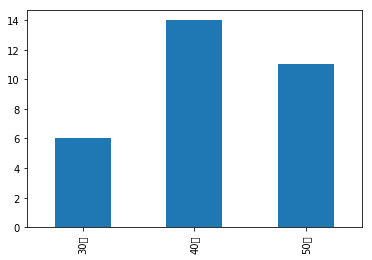

In [6]:
ds_agg.plot.bar()

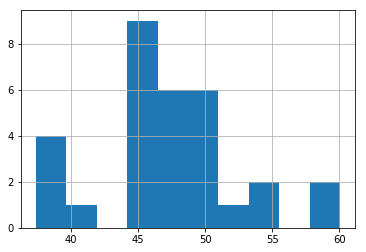

In [7]:
ds_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff96613f198>,
      dtype=object)

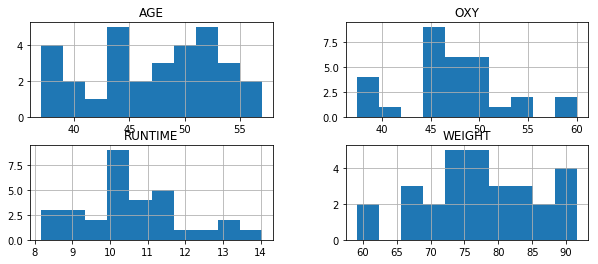

In [8]:
ds_fitness[["WEIGHT","AGE","OXY","RUNTIME"]].hist(figsize=(10,4))

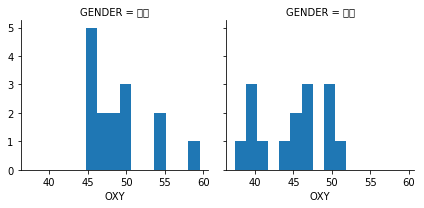

In [9]:
grid = sns.FacetGrid(ds_fitness, col="GENDER")
grid.map(plt.hist, "OXY")

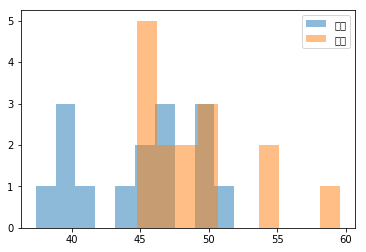

In [10]:
plt.hist(ds_fitness[ds_fitness["GENDER"]=="남성"]['OXY'], label="남성", alpha = 0.5)
plt.hist(ds_fitness[ds_fitness["GENDER"]=="여성"]['OXY'], label="여성", alpha = 0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

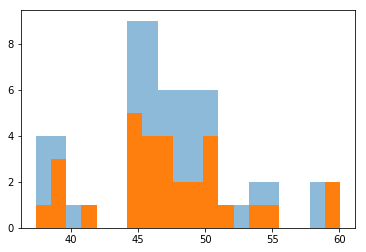

In [11]:
plt.hist(x = "OXY", data = ds_fitness, alpha=0.5)
plt.hist(x = "OXY", data = ds_fitness, bins = 20)

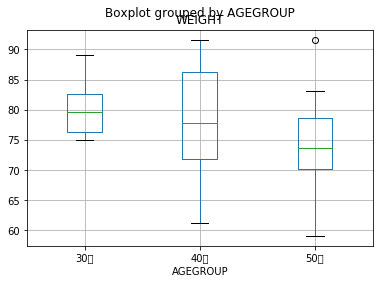

In [12]:
ds_fitness.boxplot(column="WEIGHT", by="AGEGROUP")

In [13]:
age50 = ds_fitness[ds_fitness['AGEGROUP']=='50대']

In [14]:
age50['WEIGHT']

3     70.87
7     76.32
8     59.08
9     77.91
14    83.12
15    73.71
19    69.63
20    67.25
22    79.38
27    73.37
28    91.63
Name: WEIGHT, dtype: float64

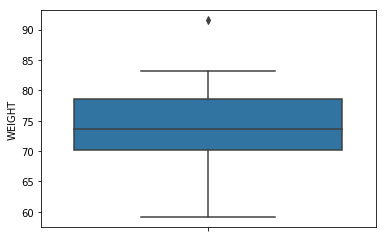

In [15]:
sns.boxplot(y = age50['WEIGHT'])

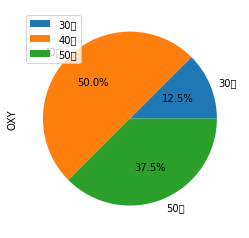

In [16]:
ds_sub = ds_fitness[ds_fitness["OXY"]>=50]
ds_count = ds_sub.groupby("AGEGROUP", as_index=False).agg("count")
ds_count.plot.pie(y="OXY", labels = ds_count["AGEGROUP"], autopct="%.1f%%")

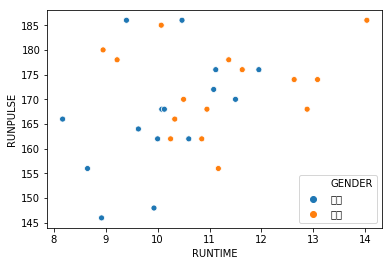

In [17]:
sns.scatterplot(x = "RUNTIME", y = "RUNPULSE", hue = "GENDER", data = ds_fitness)

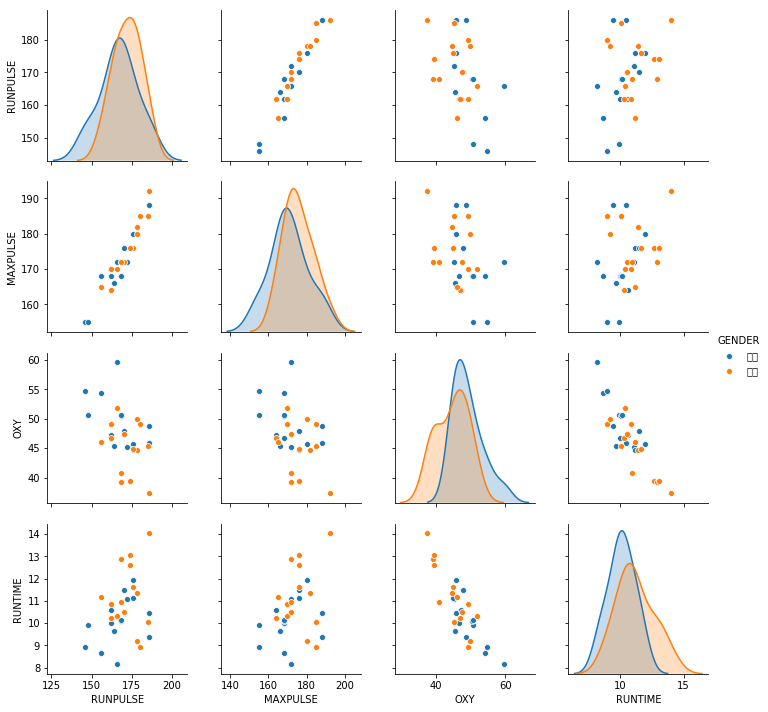

In [18]:
ds_filter = ds_fitness.filter(["RUNPULSE",'MAXPULSE',"OXY","RUNTIME","GENDER"])
sns.pairplot(ds_filter, hue="GENDER")

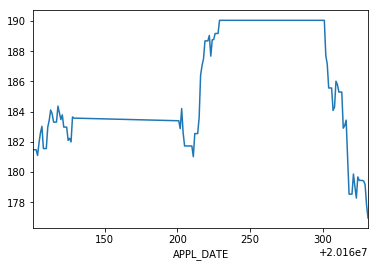

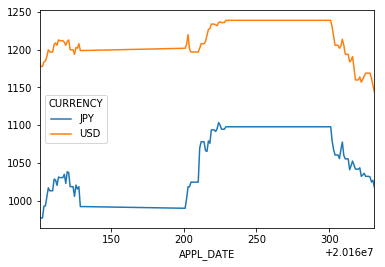

In [19]:
ds_currency_pivot = ds_currency.pivot(index="APPL_DATE", columns="CURRENCY", values="STD_RATE")
ds_currency_pivot["CNY"].plot()
ds_currency_pivot[["JPY","USD"]].plot()

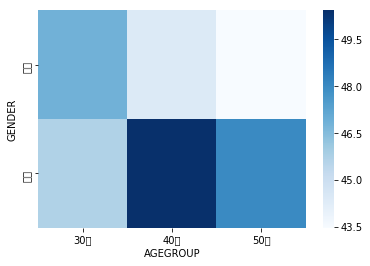

In [20]:
ds_agg = ds_fitness.groupby(["GENDER", "AGEGROUP"], as_index=False).agg('mean')
ds_pivot = ds_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(ds_pivot, cmap="Blues")

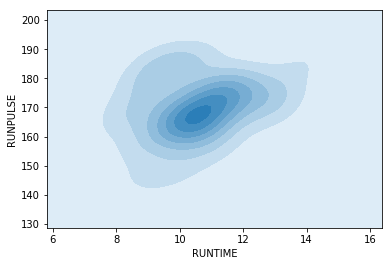

In [21]:
sns.kdeplot(ds_fitness["RUNTIME"], ds_fitness["RUNPULSE"], shade=True)

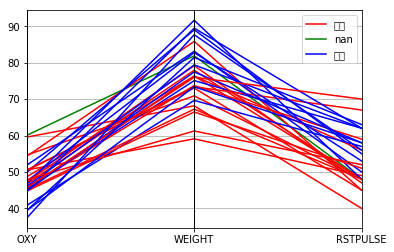

In [22]:
ds_filter = ds_fitness[["GENDER","OXY",'WEIGHT','RSTPULSE']]
ds_filter2 = ds_filter[ds_filter["RSTPULSE"]<100]
pd.plotting.parallel_coordinates(ds_filter2, "GENDER", color = ("RED",'GREEN','BLUE'))

In [23]:
ds_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


Text(0.5, 365.50909090909096, '나이그룹')

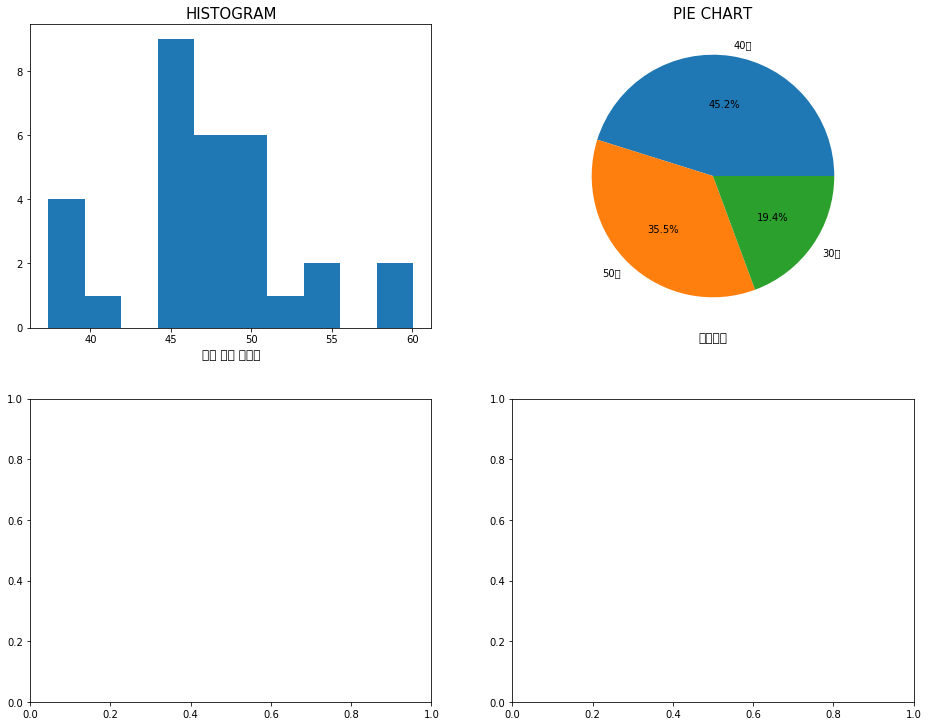

In [24]:
ds_count = ds_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13,10))
plt.tight_layout(w_pad=5, h_pad=5)
axes[0,0].hist(ds_fitness["OXY"])
axes[0,0].set_title("HISTOGRAM", fontsize = 15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize = 12)
axes[0,1].pie(ds_count, labels = ds_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("PIE CHART", fontsize = 15)
axes[0,1].set_xlabel("나이그룹", fontsize = 12)